In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in the data
df = pd.read_csv('data/Gas_AugUpdate.csv')
df.head()

,Date,Cost,Gal,Mile
0,6/16/17,10.37,4.052,83.4
1,6/19/17,15.29,7.426,194.7
2,7/14/17,21.21,10.567,274.8
3,7/24/17,24.53,12.269,254.1
4,8/18/17,19.42,9.081,163.3


In [3]:
df['mpg'] = df['Mile'] / df['Gal']

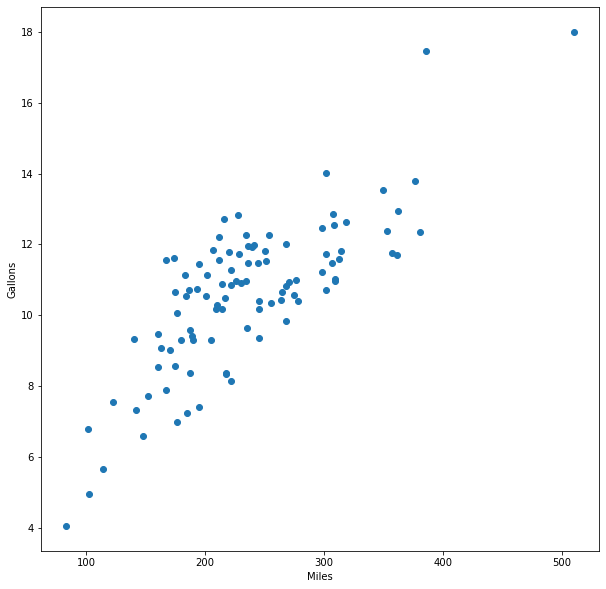

In [4]:
fig, ax = plt.subplots(figsize=(10,10))

ax = plt.scatter('Mile','Gal',data=df)
ax = plt.xlabel('Miles')
ax = plt.ylabel('Gallons')

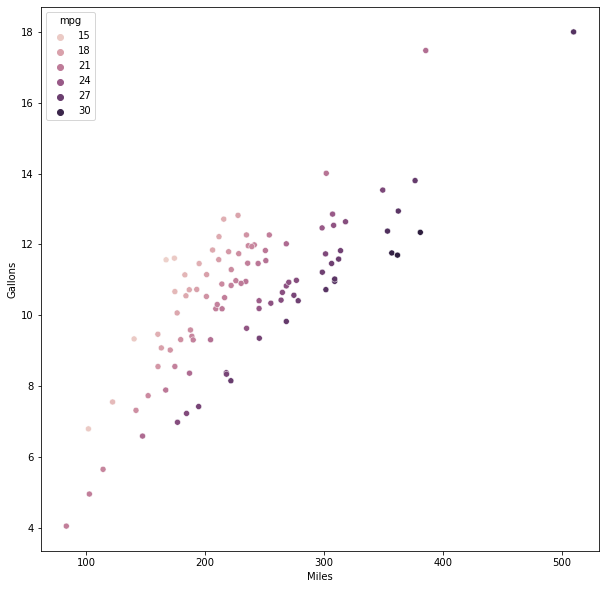

In [5]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.scatterplot('Mile','Gal',hue='mpg',data=df)
ax = plt.xlabel('Miles')
ax = plt.ylabel('Gallons')

In [6]:
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%y')

df.set_index('Date',inplace=True)

In [7]:
mpg_rolling = pd.Series(df.mpg.rolling(window=4).mean())
mpg_rolling.dropna(inplace=True)

In [8]:
mpg_rolling

Date
2017-07-24    23.379336
2017-08-18    22.729379
2017-10-01    22.195995
2017-10-14    21.588698
2017-11-11    22.508575
                ...    
2021-06-20    27.351016
2021-07-01    27.295880
2021-07-14    27.329926
2021-07-26    27.193487
2021-08-02    27.151919
Name: mpg, Length: 97, dtype: float64

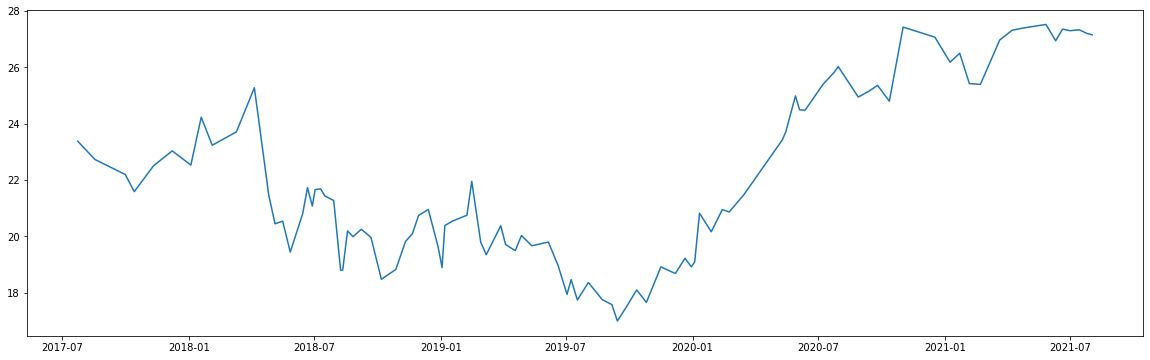

In [9]:
fig, ax = plt.subplots(figsize=(20,6))

ax = plt.plot(mpg_rolling)

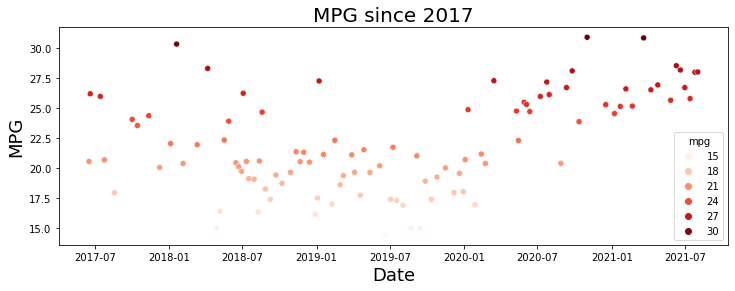

In [14]:
fig, ax = plt.subplots(figsize=(12,4))

ax = sns.scatterplot(x=df.index,y='mpg',hue='mpg',data=df,palette='Reds')
ax = plt.xlabel('Date',fontsize=18)
ax = plt.ylabel('MPG', fontsize=18)
ax = plt.title('MPG since 2017', fontsize=20)

In [11]:
X = df.reset_index().drop(['Date','Cost'],axis=1)
